IMPORTING NECESSARY LIBRARIES

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

UPLOADING TRAIN DATA

In [80]:
train_data=pd.read_csv('/content/train_ctrUa4K (1).csv')
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


PREEPROCESSING ON TRAIN DATA

1)MISSING VALUES

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [82]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [83]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].median())

In [85]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
train_data['Gender'] = train_data['Gender'].fillna(method='ffill')
train_data['Married'] = train_data['Married'].fillna(method='ffill')
train_data['Dependents'] = train_data['Dependents'].fillna(method='ffill')
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(method='ffill')

In [87]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

2)OUTLIER DETECTION

In [88]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
num_cols=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

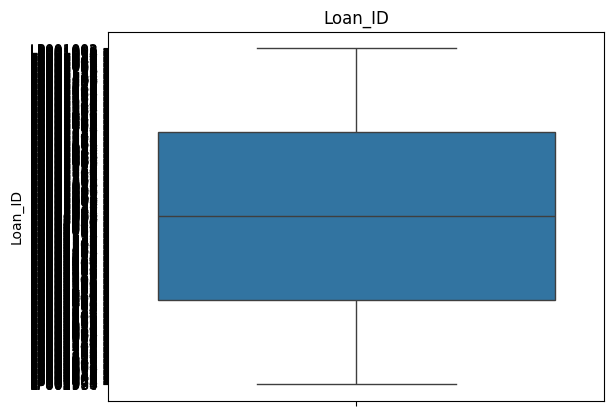

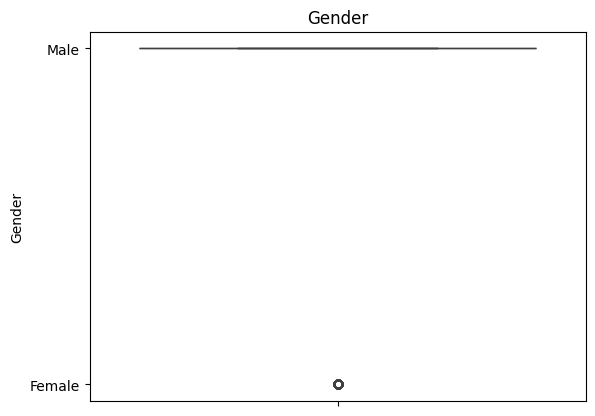

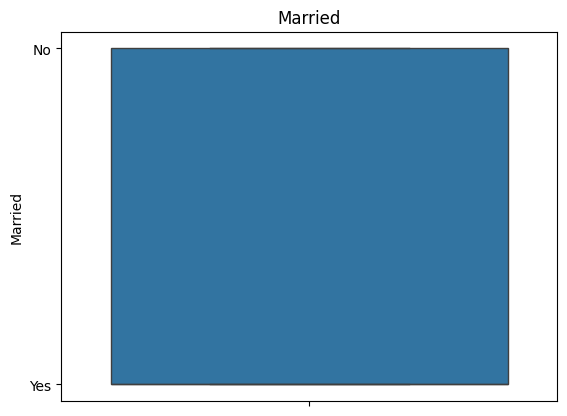

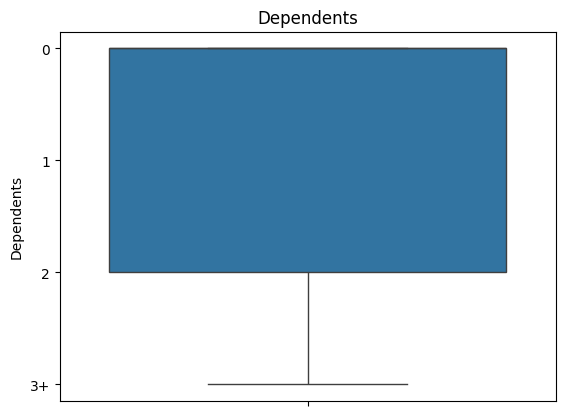

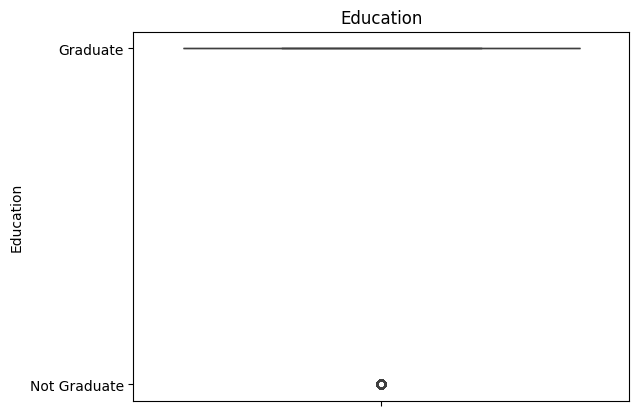

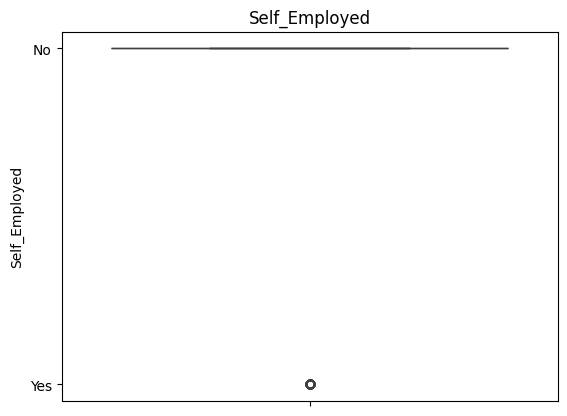

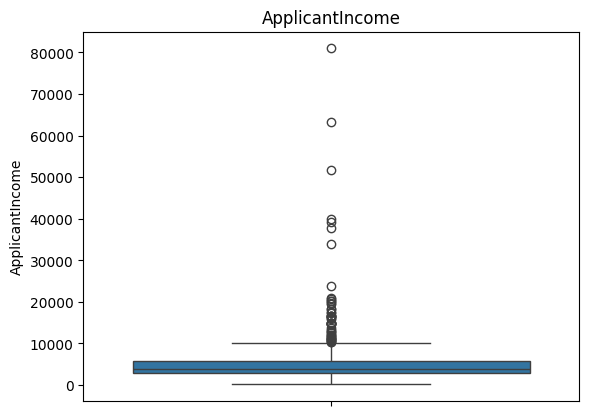

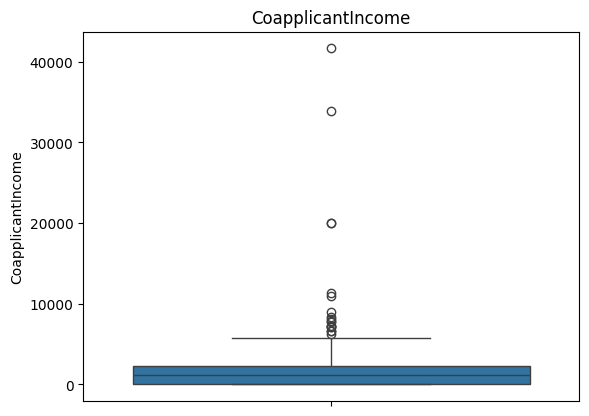

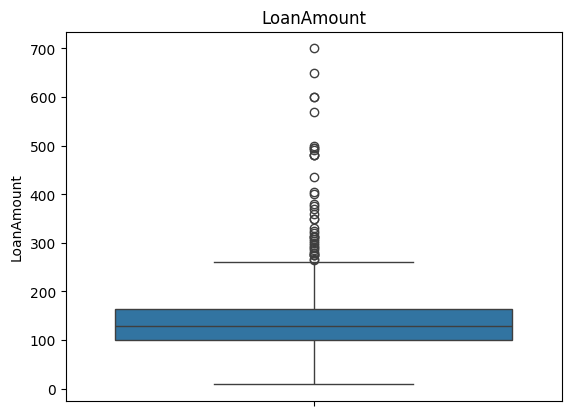

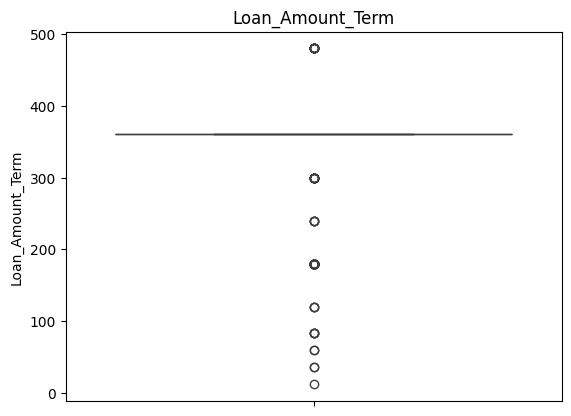

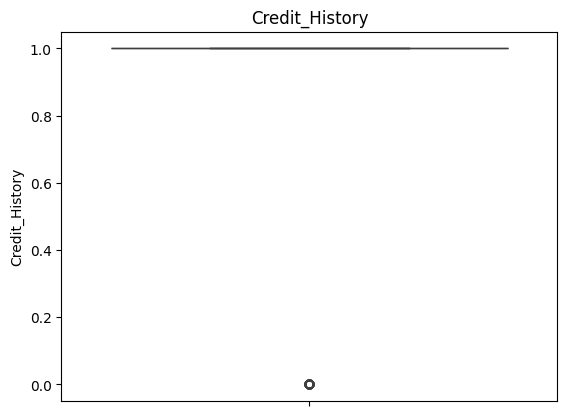

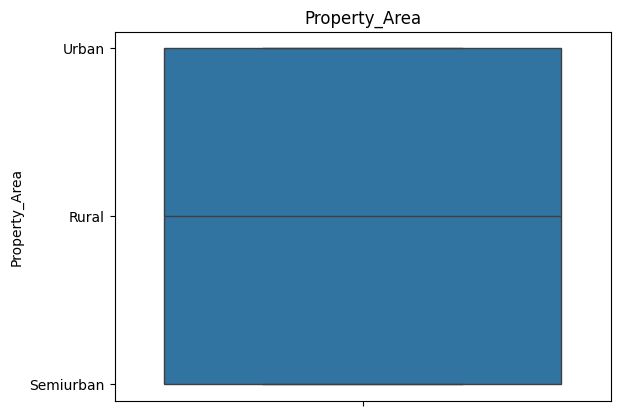

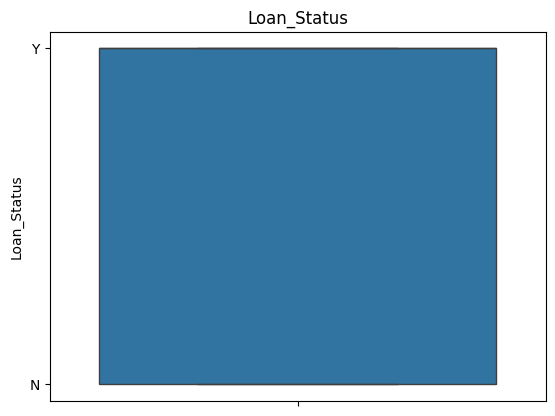

In [90]:
for i in num_cols:
    plt.figure()
    sns.boxplot(train_data[i])
    plt.title(i)

In [92]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

OUTLIER CORRECTION IN CoapplicantIncome

In [93]:
Q1=np.percentile(train_data['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(train_data['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(train_data['CoapplicantIncome'],75,method='midpoint')

In [94]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 0.0
Q2 is 1188.5
Q3 is 2292.5


In [95]:
IQR=Q3-Q1
IQR

2292.5

In [96]:
lower_limit=Q1-1.5*IQR
lower_limit


-3438.75

In [97]:
uper_limit=Q3+1.5*IQR
uper_limit

5731.25

In [98]:
outlier=[]
for x in train_data['CoapplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[10968.0,
 8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6667.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [99]:
train_data['CoapplicantIncome']=train_data['CoapplicantIncome'].clip(lower=lower_limit,upper=uper_limit)

outlier=[]
for x in train_data['CoapplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

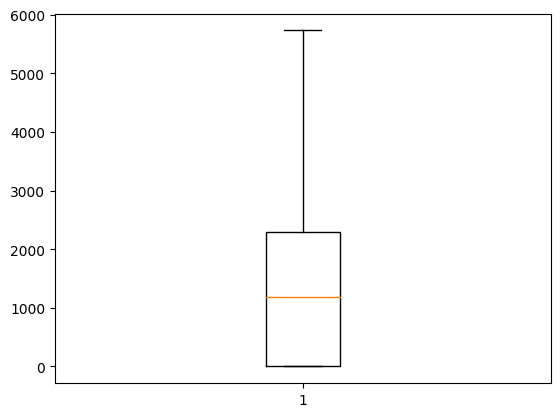

In [100]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.show();

OUTLIER CORRECTION IN ApplicantIncome

In [102]:
Q1=np.percentile(train_data['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(train_data['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(train_data['ApplicantIncome'],75,method='midpoint')

In [103]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 2879.0
Q2 is 3812.5
Q3 is 5790.0


In [104]:
IQR=Q3-Q1
IQR

2911.0

In [105]:
lower_limit=Q1-1.5*IQR
lower_limit

-1487.5

In [106]:
uper_limit=Q3+1.5*IQR
uper_limit

10156.5

In [107]:
outlier=[]
for x in train_data['ApplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

In [108]:
train_data['ApplicantIncome']=train_data['ApplicantIncome'].clip(lower=lower_limit,upper=uper_limit)

outlier=[]
for x in train_data['ApplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

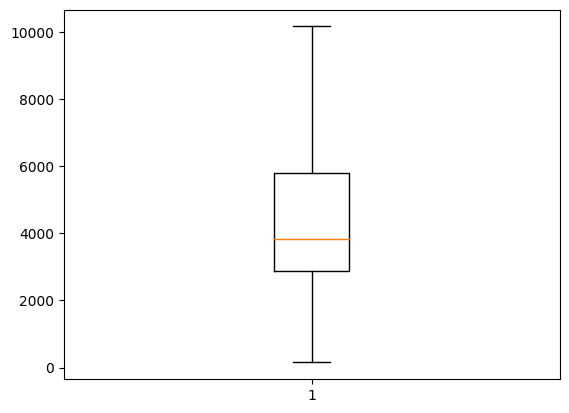

In [109]:
plt.boxplot(train_data['ApplicantIncome'])
plt.show();

OUTLIER CORRECTION IN LoanAmount

In [111]:
Q1=np.percentile(train_data['LoanAmount'],25,method='midpoint')
Q2=np.percentile(train_data['LoanAmount'],50,method='midpoint')
Q3=np.percentile(train_data['LoanAmount'],75,method='midpoint')

In [112]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 100.5
Q2 is 128.0
Q3 is 164.5


In [113]:
IQR=Q3-Q1
IQR

64.0

In [114]:
lower_limit=Q1-1.5*IQR
lower_limit

4.5

In [115]:
uper_limit=Q3+1.5*IQR
uper_limit

260.5

In [116]:
outlier=[]
for x in train_data['LoanAmount']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[267.0,
 349.0,
 315.0,
 320.0,
 286.0,
 312.0,
 265.0,
 370.0,
 650.0,
 290.0,
 600.0,
 275.0,
 700.0,
 495.0,
 280.0,
 279.0,
 304.0,
 330.0,
 436.0,
 480.0,
 300.0,
 376.0,
 490.0,
 308.0,
 570.0,
 380.0,
 296.0,
 275.0,
 360.0,
 405.0,
 500.0,
 480.0,
 311.0,
 480.0,
 400.0,
 324.0,
 600.0,
 275.0,
 292.0,
 350.0,
 496.0]

In [117]:
train_data['LoanAmount']=train_data['LoanAmount'].clip(lower=lower_limit,upper=uper_limit)

outlier=[]
for x in train_data['LoanAmount']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

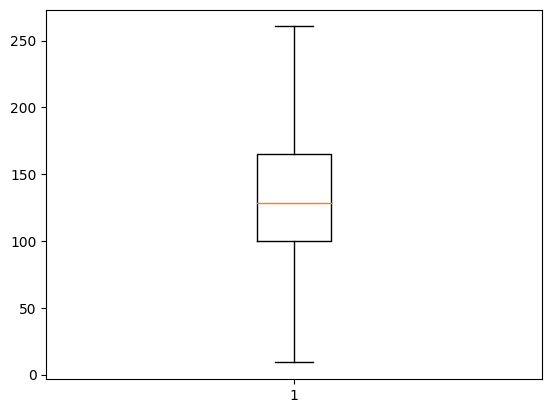

In [118]:
plt.boxplot(train_data['LoanAmount'])
plt.show();

OUTLIER CORRECTION IN Loan_Amounr_Term

In [120]:
Q1=np.percentile(train_data['Loan_Amount_Term'],25,method='midpoint')
Q2=np.percentile(train_data['Loan_Amount_Term'],50,method='midpoint')
Q3=np.percentile(train_data['Loan_Amount_Term'],75,method='midpoint')

In [121]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 360.0
Q2 is 360.0
Q3 is 360.0


In [122]:
IQR=Q3-Q1
IQR

0.0

In [123]:
lower_limit=Q1-1.5*IQR
lower_limit

360.0

In [124]:
uper_limit=Q3+1.5*IQR
uper_limit

360.0

In [125]:
outlier=[]
for x in train_data['Loan_Amount_Term']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 180.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0,
 180.0]

In [126]:
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].clip(lower=lower_limit,upper=uper_limit)

outlier=[]
for x in train_data['Loan_Amount_Term']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

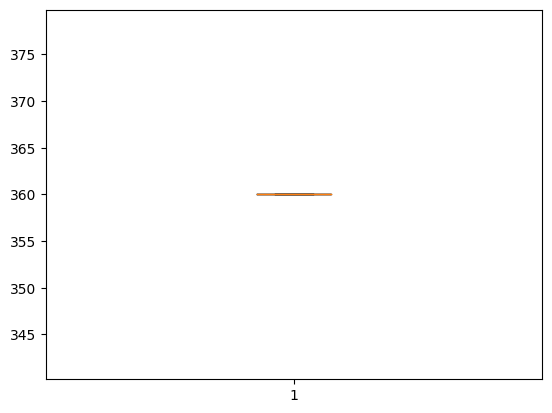

In [127]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.show();

3)*ENCODING*-label encoder

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [129]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

train_data['Loan_ID']=label_en.fit_transform(train_data['Loan_ID'])
train_data['Gender']=label_en.fit_transform(train_data['Gender'])
train_data['Married']=label_en.fit_transform(train_data['Married'])
train_data['Dependents']=label_en.fit_transform(train_data['Dependents'])
train_data['Education']=label_en.fit_transform(train_data['Education'])
train_data['Self_Employed']=label_en.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=label_en.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=label_en.fit_transform(train_data['Loan_Status'])


In [130]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


4)SCALLING-standardscaler

In [131]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_sc=sc.fit_transform(train_data)
train_sc=pd.DataFrame(train_sc)
train_sc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.729232,0.477493,-1.367172,-0.752177,-0.528362,-0.403582,0.498190,-0.874872,-0.167288,0.0,0.411733,1.223298,0.674519
1,-1.723590,0.477493,0.731437,0.236767,-0.528362,-0.403582,-0.013296,0.054640,-0.167288,0.0,0.411733,-1.318513,-1.482537
2,-1.717948,0.477493,0.731437,-0.752177,-0.528362,2.477808,-0.652856,-0.874872,-1.282678,0.0,0.411733,1.223298,0.674519
3,-1.712307,0.477493,0.731437,-0.752177,1.892641,-0.403582,-0.821331,0.578570,-0.311209,0.0,0.411733,1.223298,0.674519
4,-1.706665,0.477493,-1.367172,-0.752177,-0.528362,-0.403582,0.559196,-0.874872,0.066584,0.0,0.411733,1.223298,0.674519
5,-1.701023,0.477493,0.731437,1.225710,-0.528362,2.477808,0.323654,1.711490,2.216408,0.0,0.411733,1.223298,0.674519
6,-1.695381,0.477493,0.731437,-0.752177,1.892641,-0.403582,-0.922336,0.059571,-0.760963,0.0,0.411733,1.223298,0.674519
7,-1.689739,0.477493,0.731437,2.214653,-0.528362,-0.403582,-0.638311,0.668562,0.372417,0.0,-2.428760,-0.047607,-1.482537
8,-1.684097,0.477493,0.731437,1.225710,-0.528362,-0.403582,-0.246414,0.065735,0.552318,0.0,0.411733,1.223298,0.674519
9,-1.678455,0.477493,0.731437,0.236767,-0.528362,-0.403582,2.238495,2.657799,2.216408,0.0,0.411733,-0.047607,-1.482537


TEST DATA

In [146]:
test_data=pd.read_csv('/content/test_lAUu6dG (1).csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [147]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


MISSING VALUE

In [148]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [149]:
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [150]:
test_data['Gender'] = test_data['Gender'].fillna(method='ffill')
test_data['Married'] = test_data['Married'].fillna(method='ffill')
test_data['Dependents'] = test_data['Dependents'].fillna(method='ffill')
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(method='ffill')

In [151]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

OUTLIER

In [152]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [153]:
num_cols=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

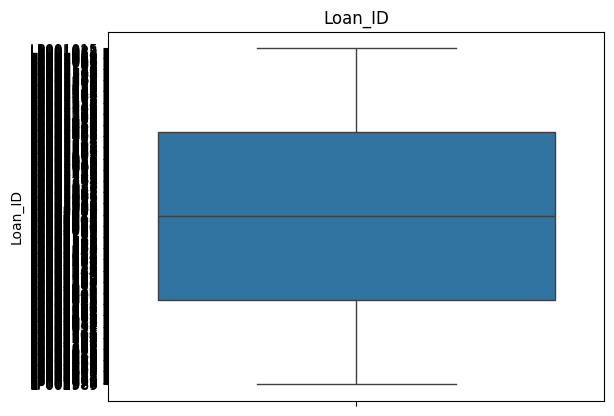

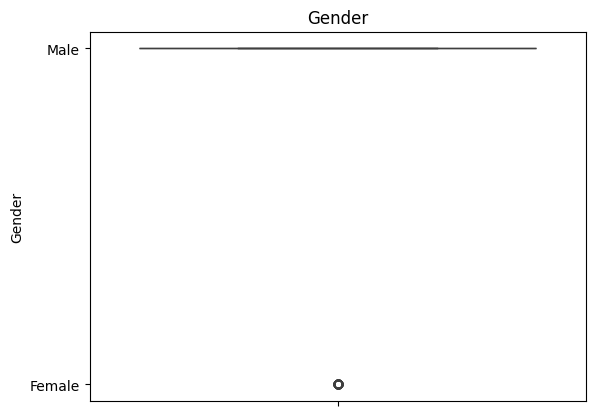

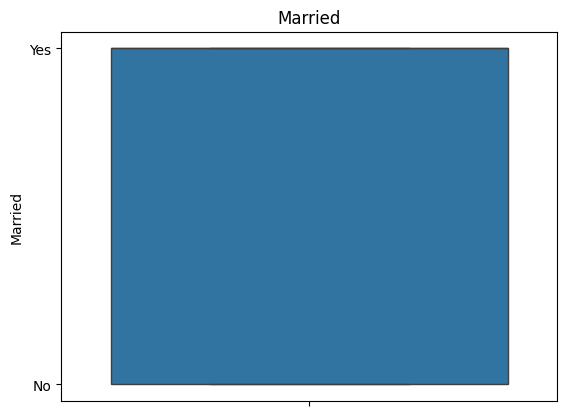

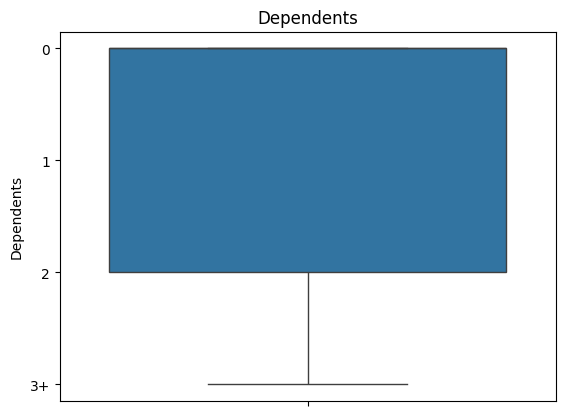

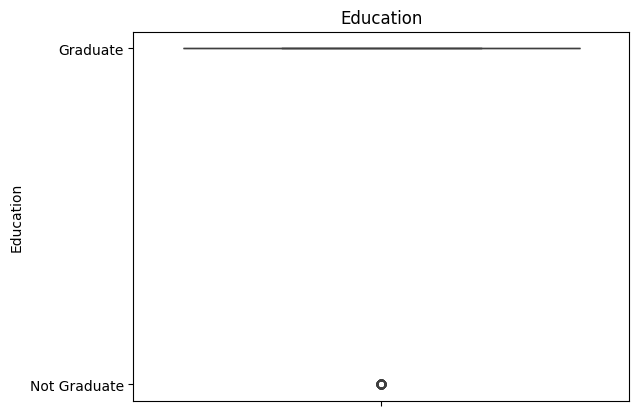

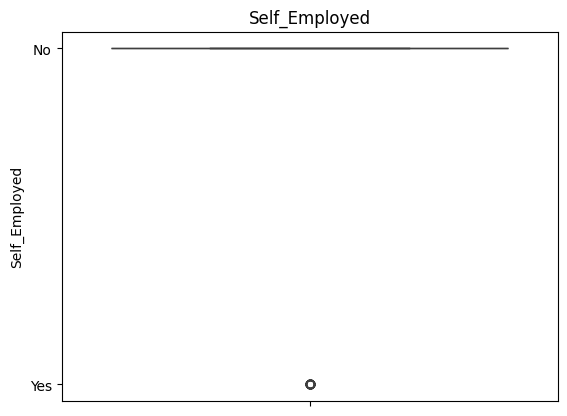

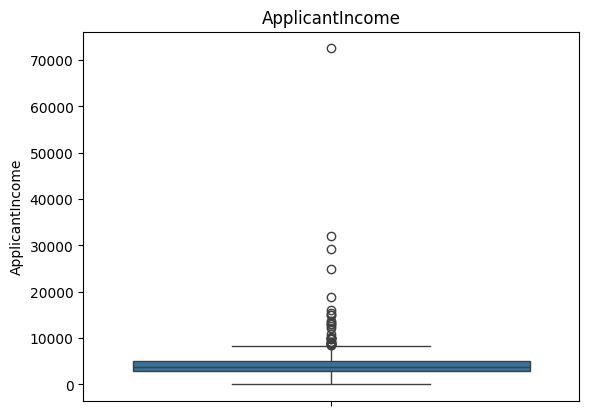

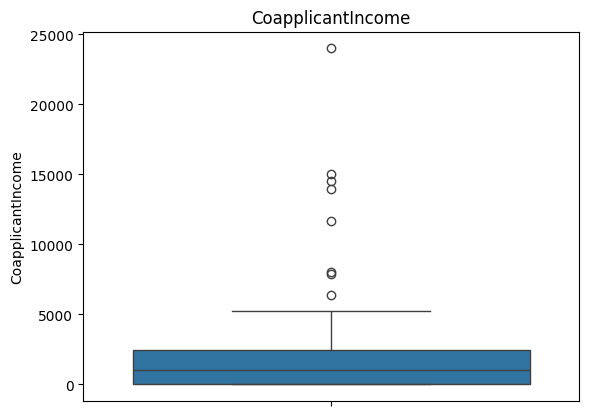

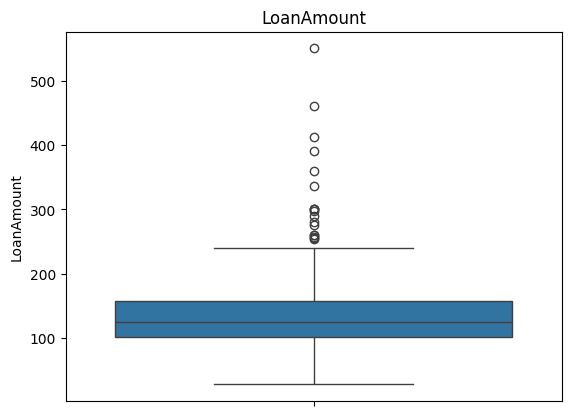

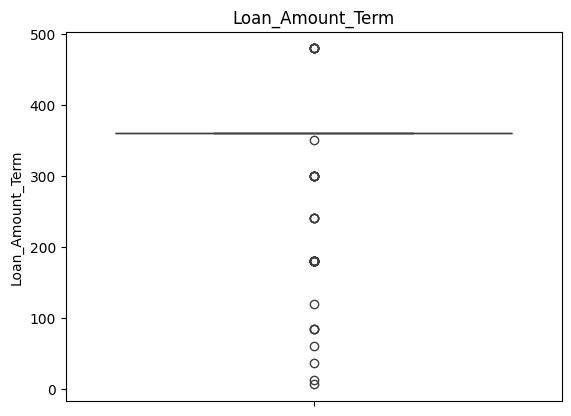

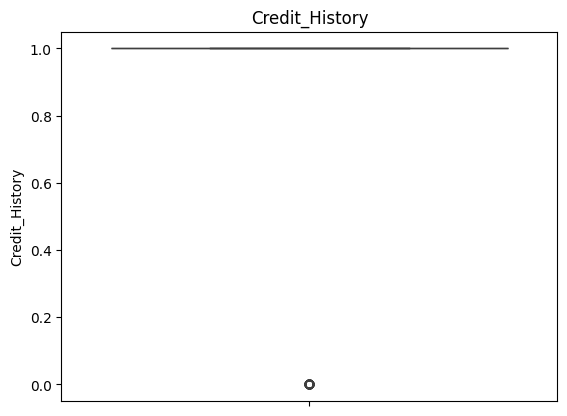

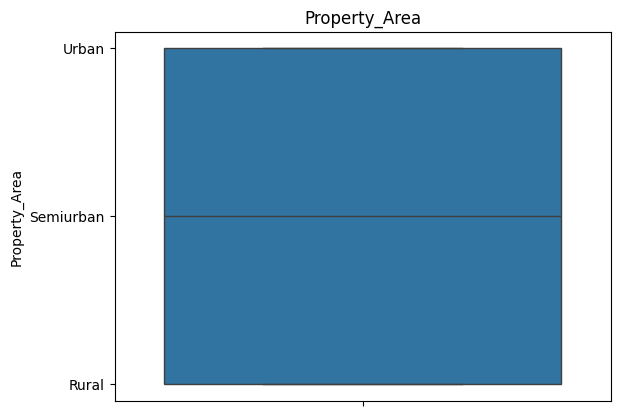

In [154]:
for i in num_cols:
    plt.figure()
    sns.boxplot(test_data[i])
    plt.title(i)

OUTLIER CORRECTION IN ApplicantIncome

In [155]:
Q1=np.percentile(test_data['ApplicantIncome'],25,method='midpoint')
Q2=np.percentile(test_data['ApplicantIncome'],50,method='midpoint')
Q3=np.percentile(test_data['ApplicantIncome'],75,method='midpoint')

In [156]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 2864.0
Q2 is 3786.0
Q3 is 5060.0


In [157]:
IQR=Q3-Q1
IQR

2196.0

In [158]:
lower_limit=Q1-1.5*IQR
lower_limit

-430.0

In [159]:
uper_limit=Q3+1.5*IQR
uper_limit

8354.0

In [160]:
outlier=[]
for x in test_data['ApplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[13633,
 12173,
 9226,
 72529,
 8449,
 13518,
 9719,
 12500,
 32000,
 10890,
 12941,
 8703,
 15312,
 10166,
 9167,
 13083,
 10000,
 8706,
 14911,
 10000,
 18840,
 24797,
 29167,
 9000,
 10000,
 8750,
 14987,
 16000,
 9699,
 8667,
 8550,
 9200]

In [161]:
test_data['ApplicantIncome']=test_data['ApplicantIncome'].clip(lower=lower_limit,upper=uper_limit)


outlier=[]
for x in test_data['ApplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

OUTLIER CORRECTION IN CoapplicantIncome

In [162]:
Q1=np.percentile(test_data['CoapplicantIncome'],25,method='midpoint')
Q2=np.percentile(test_data['CoapplicantIncome'],50,method='midpoint')
Q3=np.percentile(test_data['CoapplicantIncome'],75,method='midpoint')

In [163]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 0.0
Q2 is 1025.0
Q3 is 2430.5


In [164]:
IQR=Q3-Q1
IQR

2430.5

In [165]:
lower_limit=Q1-1.5*IQR
lower_limit

-3645.75

In [166]:
uper_limit=Q3+1.5*IQR
uper_limit

6076.25

In [167]:
outlier=[]
for x in test_data['CoapplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[7916, 24000, 8000, 6414, 14507, 13983, 11666, 15000]

In [168]:
test_data['CoapplicantIncome']=test_data['CoapplicantIncome'].clip(lower=lower_limit,upper=uper_limit)


outlier=[]
for x in test_data['CoapplicantIncome']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

OUTLIER CORRECTION IN LoanAmount

In [169]:
Q1=np.percentile(test_data['LoanAmount'],25,method='midpoint')
Q2=np.percentile(test_data['LoanAmount'],50,method='midpoint')
Q3=np.percentile(test_data['LoanAmount'],75,method='midpoint')

In [170]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 101.0
Q2 is 125.0
Q3 is 157.5


In [171]:
IQR=Q3-Q1
IQR


56.5

In [172]:
lower_limit=Q1-1.5*IQR
lower_limit

16.25

In [173]:
uper_limit=Q3+1.5*IQR
uper_limit

242.25

In [174]:
outlier=[]
for x in test_data['LoanAmount']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[280.0,
 300.0,
 290.0,
 275.0,
 360.0,
 257.0,
 390.0,
 256.0,
 300.0,
 550.0,
 260.0,
 336.0,
 412.0,
 460.0,
 297.0,
 300.0,
 260.0,
 254.0]

In [175]:
test_data['LoanAmount']=test_data['LoanAmount'].clip(lower=lower_limit,upper=uper_limit)


outlier=[]
for x in test_data['LoanAmount']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

OUTLIER CORRECTION IN Loan_Amount_Term

In [176]:

Q1=np.percentile(test_data['Loan_Amount_Term'],25,method='midpoint')
Q2=np.percentile(test_data['Loan_Amount_Term'],50,method='midpoint')
Q3=np.percentile(test_data['Loan_Amount_Term'],75,method='midpoint')

In [177]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 360.0
Q2 is 360.0
Q3 is 360.0


In [178]:
IQR=Q3-Q1
IQR

0.0

In [179]:
lower_limit=Q1-1.5*IQR
lower_limit

360.0

In [180]:
uper_limit=Q3+1.5*IQR
uper_limit

360.0

In [181]:
outlier=[]
for x in test_data['Loan_Amount_Term']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[240.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 60.0,
 480.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 84.0,
 240.0,
 12.0,
 300.0,
 300.0,
 350.0,
 240.0,
 180.0,
 84.0,
 480.0,
 300.0,
 36.0,
 480.0,
 300.0,
 180.0,
 480.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 180.0,
 480.0,
 84.0,
 300.0,
 180.0,
 120.0,
 6.0,
 240.0,
 180.0,
 180.0,
 300.0,
 180.0,
 180.0]

In [182]:
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].clip(lower=lower_limit,upper=uper_limit)


outlier=[]
for x in test_data['Loan_Amount_Term']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

OUTLIER CORRECTION IN Credit_History

In [183]:
Q1=np.percentile(test_data['Credit_History'],25,method='midpoint')
Q2=np.percentile(test_data['Credit_History'],50,method='midpoint')
Q3=np.percentile(test_data['Credit_History'],75,method='midpoint')

In [184]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 1.0
Q2 is 1.0
Q3 is 1.0


In [185]:
IQR=Q3-Q1
IQR

0.0

In [186]:
lower_limit=Q1-1.5*IQR
lower_limit

1.0

In [187]:
uper_limit=Q3+1.5*IQR
uper_limit

1.0

In [188]:
outlier=[]
for x in test_data['Credit_History']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [189]:
test_data['Credit_History']=test_data['Credit_History'].clip(lower=lower_limit,upper=uper_limit)


outlier=[]
for x in test_data['Credit_History']:
    if ((x>uper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier

[]

ENCODING ON TEST DATA

In [190]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

test_data['Loan_ID']=label_en.fit_transform(test_data['Loan_ID'])
test_data['Gender']=label_en.fit_transform(test_data['Gender'])
test_data['Married']=label_en.fit_transform(test_data['Married'])
test_data['Dependents']=label_en.fit_transform(test_data['Dependents'])
test_data['Education']=label_en.fit_transform(test_data['Education'])
test_data['Self_Employed']=label_en.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=label_en.fit_transform(test_data['Property_Area'])



In [191]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2


STANDARD SCALING ON TEST DATA

In [192]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_sc=sc.fit_transform(test_data)
test_sc=pd.DataFrame(test_sc)
test_sc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.727338,0.511046,0.758358,-0.785203,-0.544812,-0.339855,0.760162,-0.892107,-0.468560,0.0,0.0,1.118764
1,-1.717899,0.511046,0.758358,0.141387,-0.544812,-0.339855,-0.596907,0.046623,-0.127134,0.0,0.0,1.118764
2,-1.708460,0.511046,0.758358,1.067978,-0.544812,-0.339855,0.390612,0.234369,1.622677,0.0,0.0,1.118764
3,-1.699021,0.511046,0.758358,1.067978,-0.544812,-0.339855,-0.974669,0.701230,-0.681952,0.0,0.0,1.118764
4,-1.689582,0.511046,-1.318638,-0.785203,1.835497,-0.339855,-0.494255,-0.892107,-1.151413,0.0,0.0,1.118764
5,-1.680143,0.511046,0.758358,-0.785203,1.835497,2.942430,-1.064491,1.249448,0.427684,0.0,0.0,1.118764
6,-1.670704,-1.956770,-1.318638,0.141387,1.835497,-0.339855,-1.033181,-0.892107,-1.556857,0.0,0.0,-0.095989
7,-1.661265,0.511046,0.758358,1.067978,1.835497,-0.339855,-0.183730,-0.892107,0.320989,0.0,0.0,-1.310741
8,-1.651826,0.511046,0.758358,1.067978,-0.544812,-0.339855,2.112098,-0.892107,2.353543,0.0,0.0,1.118764
9,-1.642387,0.511046,-1.318638,-0.785203,1.835497,-0.339855,-0.943874,0.609860,-0.191151,0.0,0.0,-0.095989


In [216]:
test_data2=test_data.copy()
test_data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.0,360.0,1.0,2


In [217]:
train_data2=train_data.copy()
train_data2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


MODELLING

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [219]:
# Prepare data
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [220]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [222]:
# Validate model
y_pred = model.predict(X_val)

TUNNING

In [223]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, None]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'max_depth': 5, 'n_estimators': 200}


In [224]:
# Predict on test set
test_predictions = clf.predict(test_data.drop('Loan_ID', axis=1))

LOADING SAMPLE SUBMISSION

In [225]:
sample_submission = pd.read_csv('/content/sample_submission_49d68Cx (1).csv')
sample_submission['Loan_Status'] = test_predictions
sample_submission.to_csv('final_submission.csv', index=False)

In [226]:
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [227]:
 from google.colab import files

files.download('final_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>